In [103]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aiffel-ds-3-house-prices/sample_submission.csv
/kaggle/input/aiffel-ds-3-house-prices/train.csv
/kaggle/input/aiffel-ds-3-house-prices/test.csv


In [104]:
train = pd.read_csv("/kaggle/input/aiffel-ds-3-house-prices/train.csv") 
test = pd.read_csv("/kaggle/input/aiffel-ds-3-house-prices/test.csv")
submission = pd.read_csv("/kaggle/input/aiffel-ds-3-house-prices/sample_submission.csv")

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

train_df=train.copy()
train_df.head(3)



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,968,20,RL,NaN,7390,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,135000
1,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000
2,696,20,RL,54.0,13811,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,176000


In [106]:
train_df.shape

(1168, 81)

In [107]:
test.shape

(292, 80)

In [108]:
train_df.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

In [109]:
train_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      218
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [110]:
isnull_series=train_df.isnull().sum()
isnull_series[isnull_series>0].sort_values(ascending=False)


PoolQC          1162
MiscFeature     1120
Alley           1098
Fence            941
MasVnrType       694
FireplaceQu      545
LotFrontage      218
GarageType        69
GarageYrBlt       69
GarageFinish      69
GarageQual        69
GarageCond        69
BsmtFinType2      24
BsmtExposure      24
BsmtFinType1      23
BsmtCond          23
BsmtQual          23
MasVnrArea         8
Electrical         1
dtype: int64

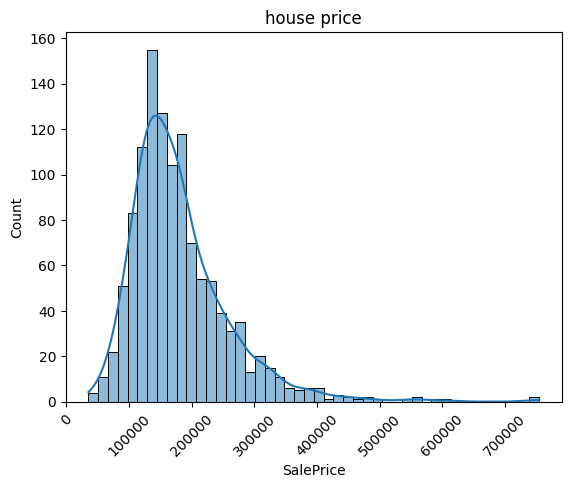

In [111]:
plt.title('house price')
plt.xticks(rotation=45)
sns.histplot(train_df['SalePrice'],kde=True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

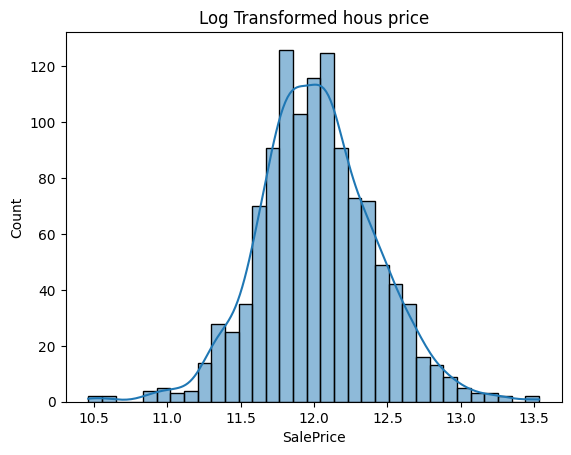

In [112]:
plt.title('Log Transformed hous price')
log_SalePrice=np.log1p(train_df['SalePrice'])
sns.histplot(log_SalePrice,kde=True)
plt.show

In [114]:
original_SalePrice=train_df['SalePrice']
train_df['SalePrice']=np.log1p(train_df['SalePrice'])

In [115]:
train_df[['MasVnrType']]

,MasVnrType
0,BrkFace
1,NaN
2,BrkFace
3,BrkFace
4,NaN
...,...
1163,NaN
1164,NaN
1165,BrkFace
1166,BrkFace


In [116]:
drop_columns=['Id','PoolQC','MiscFeature','Alley','Fence','FireplaceQu']
train_df.drop(drop_columns,axis=1,inplace=True)

In [117]:
train_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RL,NaN,7390,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2008,WD,Normal,2.550463
1,90,RL,60.0,10800,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2009,WD,Alloca,2.572242
2,20,RL,54.0,13811,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2006,WD,Normal,2.570950
3,20,RL,93.0,12030,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,12,2007,New,Partial,2.615190
4,50,RL,60.0,8064,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2000,7,2007,WD,Normal,2.543108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,50,RM,63.0,11426,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2008,WD,Normal,2.580677
1164,20,RL,137.0,16492,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,6,2010,WD,Normal,2.576786
1165,20,RL,NaN,11423,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2000,5,2010,WD,Normal,2.603694
1166,120,RL,62.0,12677,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,4,2008,WD,Normal,2.604236


In [118]:
train_df.fillna(train_df.mean,inplace=True)

In [119]:
null_column_count=train_df.isnull().sum()[train_df.isnull().sum()>0]
print('##Null 피처의 Type:\n',train_df.dtypes[null_column_count.index])

##Null 피처의 Type:
 Series([], dtype: object)


In [120]:
train_df.shape

(1168, 75)

In [139]:
train_df_ohe=pd.get_dummies(data=train_df,drop_first = True)

RecursionError: maximum recursion depth exceeded

In [123]:
# train_obj_df = train_df.select_dtypes(include='object')
# print('Object type columns:\n',train_obj_df.columns)

Object type columns:
 Index(['MSZoning', 'LotFrontage', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')


In [124]:
# train_dummy_df = pd.get_dummies(train_obj_df, drop_first=True)
# train_dummy_df.index = train_df_index
# train_dummy_df.head()

RecursionError: maximum recursion depth exceeded

In [ ]:
def get_rmse(model):
    pred=model.predict(X_test)
    mse=mean_squared_error(y_test, pred)
    rmse=np.sqrt(mse)
    print(model.__class__.__name__,'로그 변환된 RMSE:',np.round(rmse,3))
    return rmse
def get_rmses(models):
    rmses=[]
    for model in models:
        rmse=get_rmse(model)
        rmses.append(rmse)
    return rmses    


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso

y_target=train_df_ohe['SalePrice']
X_features=train_df_ohe.drop('SalePrice',axis=1,inplace=False)

X_train, X_test, y_train, y_test=train_test_split(X_features,y_target,test_size=0.2,random_state=156)
lr_reg=LinearRegression()
lr_reg.fit(X_train,y_train)
ridge_reg = Ridge()
ridge_reg.fit(X_train,y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train,y_train)

models=[lr_reg,ridge_reg,lasso_reg]
get_rmses

In [ ]:
def print_best_params(model,params):
    grid_model = GridSearchCV(model, params_grid=params,scoring='neg_mean_squared_error' ,cv=5)
    grid.model.fit(X_features, y_target)
    rmse=np.sqrt(-1*grid_model.best_score_)
    print('{0} 5 CV시 최적 평균 RMSE 값:{1},최적 alpha:{2}'.format(model.__class__.__name__,np.round(rmse,4),grid_model.best_params))
ridge_params={'alpha':[0.05,0.1,1,5,8,10,12,15,20]} 
lasso_params={'alpha':[0.001,0.005,0.008,0.05,0.03,0.1,0.5,1,5,10]} 
print_best_params(ridge_reg,ridge_params)
print_best_params(lasso_reg,lasso_params)